In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline


In [4]:
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 

# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24, test_size = 0.3)

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.5771752777048791

In [14]:
lr = Ridge()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.5771749099675626

In [20]:

poly = PolynomialFeatures(degree=2, include_bias=False).set_output(transform='pandas')

lr = LinearRegression()

pipe = Pipeline([("Poly", poly), ("REG", lr)])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.7807023265195984

In [22]:
poly = PolynomialFeatures(degree=2, include_bias=False).set_output(transform='pandas')

lr = Ridge()

pipe = Pipeline([("Poly", poly), ("REG", lr)])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.7787728514693394

In [26]:

poly = PolynomialFeatures(degree=3, include_bias=False).set_output(transform='pandas')

lr = LinearRegression()

pipe = Pipeline([("Poly", poly), ("REG", lr)])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.8622817297882757

In [30]:
poly = PolynomialFeatures(degree=3, include_bias=False).set_output(transform='pandas')

lr = Ridge()

pipe = Pipeline([("Poly", poly), ("REG", lr)])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.96075e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.8695065063191985

In [40]:
poly = PolynomialFeatures(degree=3, include_bias=False).set_output(transform='pandas')
X_poly_trn = poly.fit_transform(X_train)
X_poly_tst = poly.transform(X_test)
lr = Ridge()
lr.fit(X_poly_trn, y_train)
y_pred = lr.predict(X_poly_tst)
r2_score(y_test, y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.96075e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.8695065063191985

In [42]:
df_coef = pd.DataFrame({'col_names' : list(X_poly_trn.columns), 
                       "coef" : list(lr.coef_[0])})
print(df_coef.shape)
df_coef[df_coef['coef'] > 0.0001]

(164, 2)


,col_names,coef
1,Blast Furnace Slag,0.636144
5,Coarse Aggregate,2.612272
6,Fine Aggregate,0.909094
7,Age,0.123618
8,Cement^2,0.010445
9,Cement Blast Furnace Slag,0.031224
10,Cement Fly Ash,0.008666
14,Cement Fine Aggregate,0.023399
16,Blast Furnace Slag^2,0.004927
17,Blast Furnace Slag Fly Ash,0.015132


In [76]:
arr = np.linspace(0.000001, 10, 20)
out = []
def temp(alp):
    ridge = Ridge(alpha = alp)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    # print(r2_score(y_test, y_pred))
    out.append(r2_score(y_test, y_pred))
    

for i in arr:
    temp(i/100)


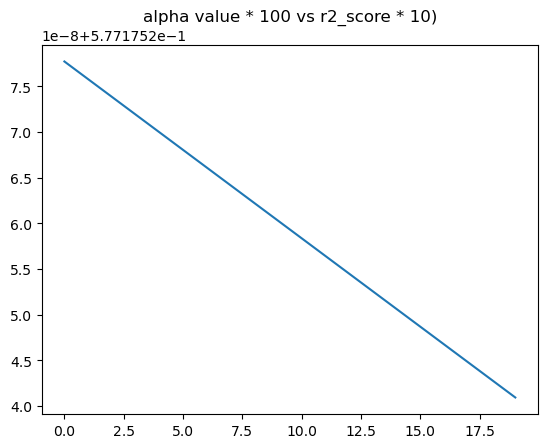

In [78]:
plt.plot(out)
plt.title("alpha value * 100 vs r2_score * 10)")
plt.show()

In [82]:

np.argmax(out), arr[np.argmax(out)]

(0, 1e-06)